<a href="https://colab.research.google.com/github/JardinDelSol/ZoomAttendenceCheck/blob/master/Copy_of_FacialRecog_JY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Conv2D, Dropout, MaxPooling2D

In [ ]:
from keras.utils import np_utils
from keras.optimizers import SGD

In [ ]:
import keras.callbacks as callbacks
import numpy as np

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

In [ ]:
import glob
import cv2
import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
map_characters = {0: 'face', 1: 'Jiho', 2: 'Yujee'}
pic_size = 64
batch_size = 32
epochs = 200
num_classes = len(map_characters)

In [ ]:
def load_test_set(path):
    pics, labels = [], [] 
    reverse_dict = {v:k for k,v in map_characters.items()}
    for pic in glob.glob(path+'*.*'):
        char_name = "_".join(pic.split('/')[5].split('_')[:-1])
        if char_name in reverse_dict:
            temp = cv2.imread(pic)
            temp = cv2.resize(temp, (pic_size,pic_size)).astype('float32') / 255.
            pics.append(temp)
            labels.append(reverse_dict[char_name])
    X_test = np.array(pics)
    y_test = np.array(labels)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    print("Test set", X_test.shape, y_test.shape)
    return X_test, y_test

folderpath = "/content/drive/My Drive/collection/"

In [ ]:
x_test, y_test = load_test_set(folderpath)

Test set (1255, 64, 64, 3) (1255, 3)


In [ ]:
input_shape=(pic_size,pic_size,3)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=input_shape, name = "conv2D_1"))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), name = "conv2D_2"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', name = "conv2D_3"))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), name = "conv2D_4"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(256, (3, 3), padding='same', name = "conv2D_5")) 
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), name = "conv2D_6"))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
opt = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics =['accuracy'])

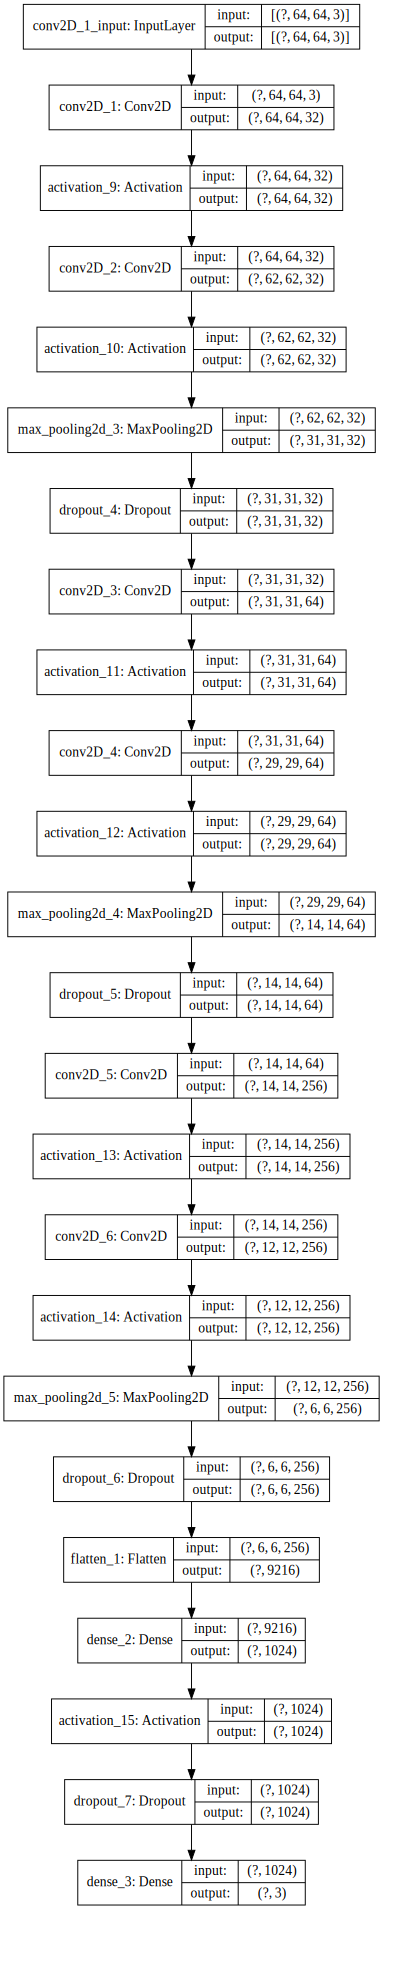

In [ ]:
SVG(model_to_dot(model, show_shapes=True, dpi = 70).create(prog = 'dot', format= 'svg'))

In [ ]:
earlyStopping = callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)

In [ ]:
model.fit(x_test, y_test, batch_size=batch_size, epochs = epochs, callbacks=[earlyStopping], validation_split = 0.2)

Epoch 1/200
32/32 [==============================] - 1s 28ms/step - loss: 0.9099 - accuracy: 0.5647 - val_loss: 0.4599 - val_accuracy: 1.0000
Epoch 2/200
32/32 [==============================] - 1s 16ms/step - loss: 0.6910 - accuracy: 0.7201 - val_loss: 0.0371 - val_accuracy: 1.0000
Epoch 3/200
32/32 [==============================] - 1s 16ms/step - loss: 0.2903 - accuracy: 0.8984 - val_loss: 0.1210 - val_accuracy: 1.0000
Epoch 4/200
32/32 [==============================] - 0s 16ms/step - loss: 0.0725 - accuracy: 0.9771 - val_loss: 0.0055 - val_accuracy: 1.0000
Epoch 5/200
32/32 [==============================] - 1s 16ms/step - loss: 0.0253 - accuracy: 0.9910 - val_loss: 5.0478e-04 - val_accuracy: 1.0000
Epoch 6/200
32/32 [==============================] - 1s 16ms/step - loss: 0.0235 - accuracy: 0.9950 - val_loss: 7.1066e-04 - val_accuracy: 1.0000
Epoch 7/200
32/32 [==============================] - 1s 16ms/step - loss: 0.0065 - accuracy: 0.9970 - val_loss: 0.0027 - val_accuracy: 1.000

In [ ]:
y_pred = model.predict(x_test)
print('\n', sklearn.metrics.classification_report(np.where(y_test > 0)[1], 
                                                  np.argmax(y_pred, axis=1), 
                                                  target_names=list(map_characters.values())), sep='')


              precision    recall  f1-score   support

        face       1.00      1.00      1.00       296
        Jiho       1.00      1.00      1.00       407
       Yujee       1.00      1.00      1.00       552

    accuracy                           1.00      1255
   macro avg       1.00      1.00      1.00      1255
weighted avg       1.00      1.00      1.00      1255



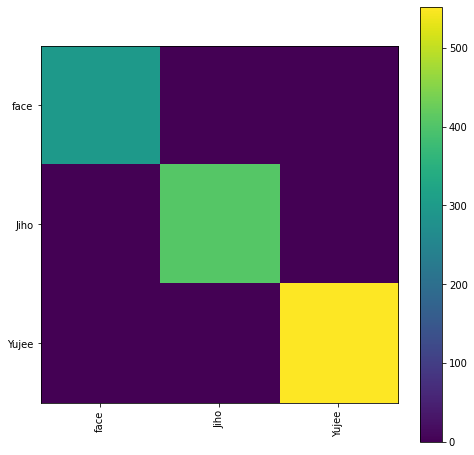

In [ ]:
plt.figure(figsize=(8,8))
cnf_matrix = sklearn.metrics.confusion_matrix(np.where(y_test > 0)[1], np.argmax(y_pred, axis=1))
classes = list(map_characters.values())
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

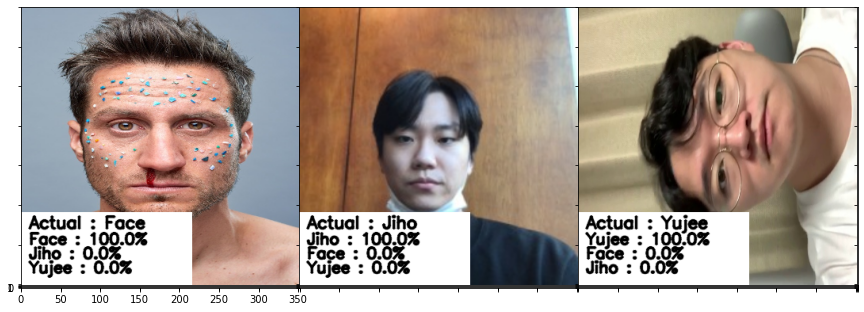

In [ ]:
from mpl_toolkits.axes_grid1 import AxesGrid

F = plt.figure(1, (15,20))
grid = AxesGrid(F, 111, nrows_ncols=(4, 4), axes_pad=0, label_mode="1")

for i in range(3):
    char = map_characters[i]
    image = cv2.imread(np.random.choice([k for k in glob.glob('/content/drive/My Drive/collection/*.*') if char in k]))
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pic = cv2.resize(image, (64, 64)).astype('float32') / 255.
    a = model.predict(pic.reshape(1, 64, 64,3))[0]
    actual = char.split('_')[0].title()
    text = sorted(['{:s} : {:.1f}%'.format(map_characters[k].split('_')[0].title(), 100*v) for k,v in enumerate(a)], 
       key=lambda x:float(x.split(':')[1].split('%')[0]), reverse=True)[:3]
    img = cv2.resize(img, (352, 352))
    cv2.rectangle(img, (0,260),(215,352),(255,255,255), -1)
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, 'Actual : %s' % actual, (10, 280), font, 0.7,(0,0,0),2,cv2.LINE_AA)
    for k, t in enumerate(text):
        cv2.putText(img, t,(10, 300+k*18), font, 0.65,(0,0,0),2,cv2.LINE_AA)
    grid[i].imshow(img)